<a href="https://colab.research.google.com/github/sai-2421/project_4/blob/main/ICM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import sklearn
print(sklearn.__version__)

1.3.2


In [ ]:
pip install scikit-learn==1.3.2


In [ ]:
#excel to df file

df = pd.read_excel('/content/Copper_Set.xlsx')


#df

In [ ]:
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
df.shape

(181673, 14)

In [ ]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [ ]:
df.dtypes

,0
id,object
item_date,float64
quantity tons,object
customer,float64
country,float64
status,object
item type,object
application,float64
thickness,float64
width,float64


In [ ]:
# dealing with data in wrong format,for categorical variables,
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [ ]:
df.dtypes

,0
id,object
item_date,object
quantity tons,float64
customer,float64
country,float64
status,object
item type,object
application,float64
thickness,float64
width,float64


In [ ]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [ ]:
df.isnull().sum()

,0
id,2
item_date,3
quantity tons,1
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0


In [ ]:
# material_ref has large set of null values, so replacing them with unknown because if we remove, it spoils our data.
df['material_ref'].fillna('unknown', inplace=True)

In [ ]:
df.isnull().sum()

,0
id,2
item_date,3
quantity tons,1
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0


In [ ]:
# deleting null values.
df = df.dropna()

In [ ]:
# quantity and selling price values are not below 0. so we convert to null for below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.isnull().sum()

,0
id,0
item_date,0
quantity tons,4
customer,0
country,0
status,0
item type,0
application,0
thickness,0
width,0


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
id,0
item_date,0
quantity tons,0
customer,0
country,0
status,0
item type,0
application,0
thickness,0
width,0


In [ ]:
df1 = df.copy()
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [ ]:
# Changing Column names containing spaces

df = df.rename(columns={'delivery date': 'delivery_date'})
df = df.rename(columns={'item type': 'item_type'})
df = df.rename(columns={'quantity tons': 'quantity_tons'})

In [ ]:
df1 = df.copy()
df1.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [ ]:
# droping the columns

df1.drop(columns=['id','material_ref'], inplace=True)
df1.head()

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


In [ ]:
df.country.unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.])

In [ ]:
df.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [ ]:
df.application.unique()

array([10., 41., 28., 59., 15.,  4., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67., 79.,  3., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68.])

In [ ]:
df.item_type.unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

**skewness and outliers**

In [ ]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

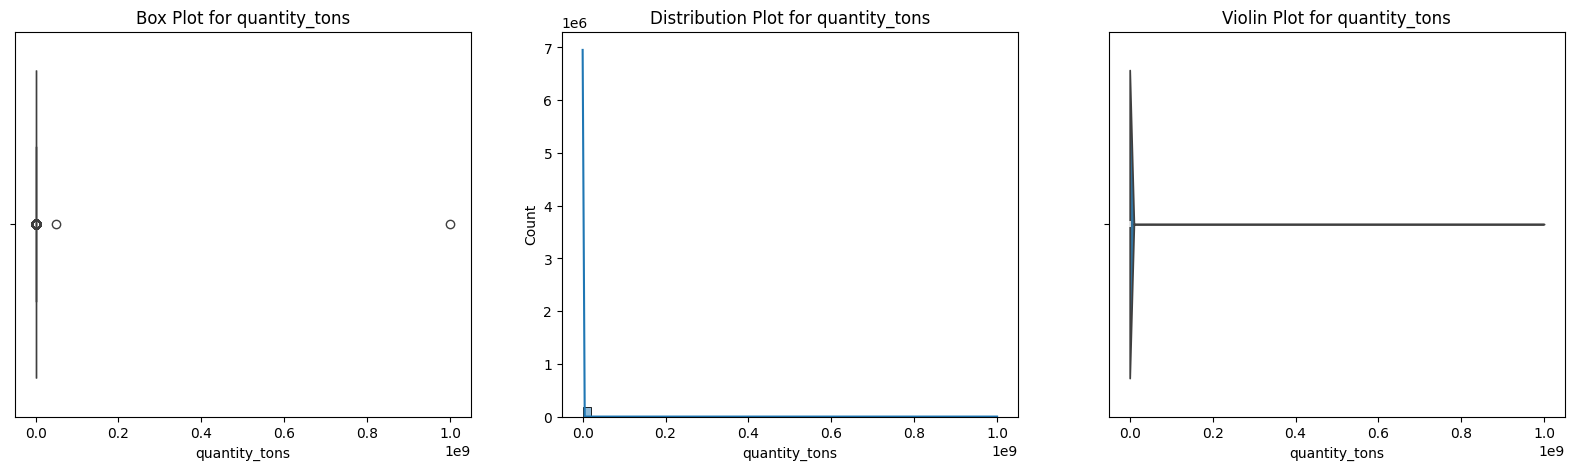

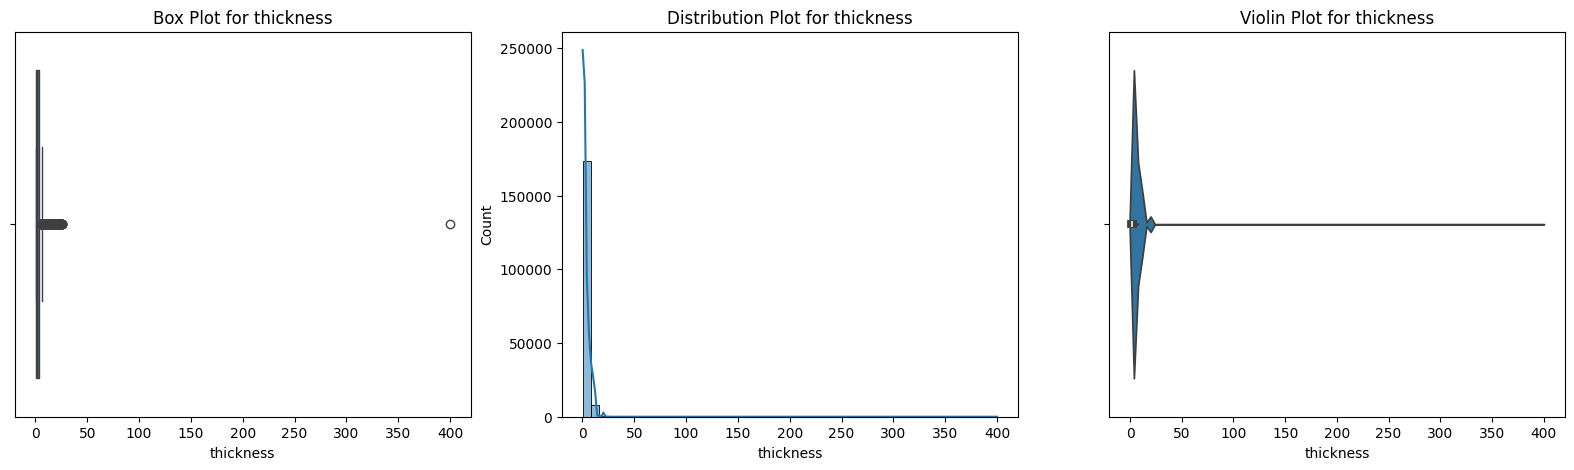

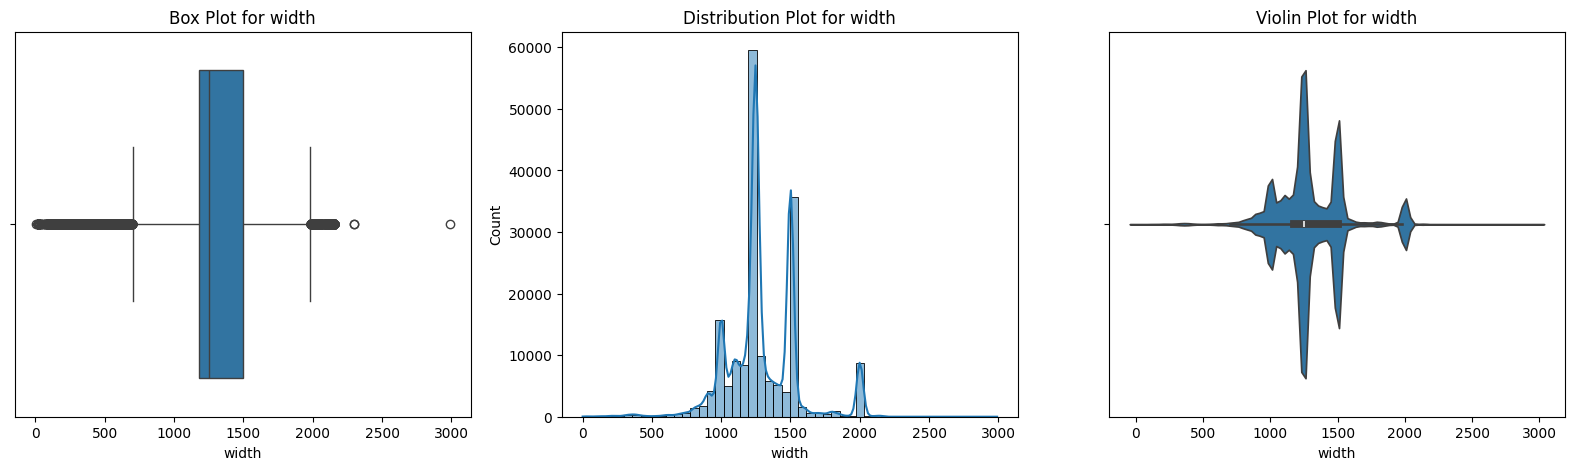

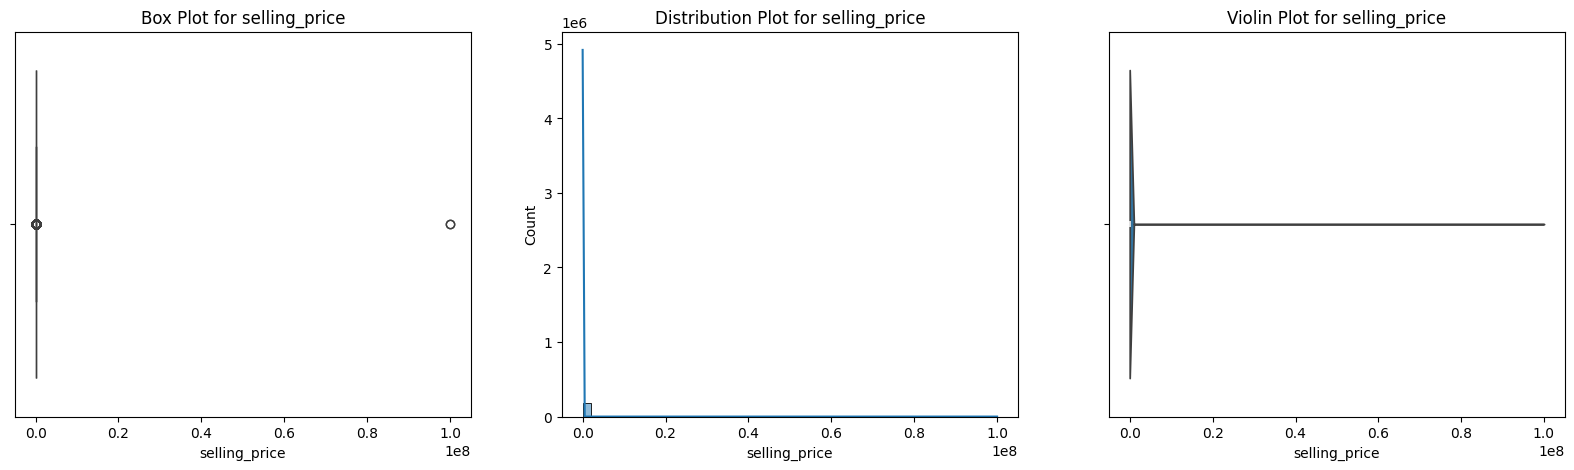

In [ ]:
for i in ['quantity_tons', 'thickness', 'width', 'selling_price']:
    plot(df1, i)

In [ ]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data


df1['quantity_tons_log'] = np.log(df1['quantity_tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1.head()

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,quantity_tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.666354,1.386294,6.357842


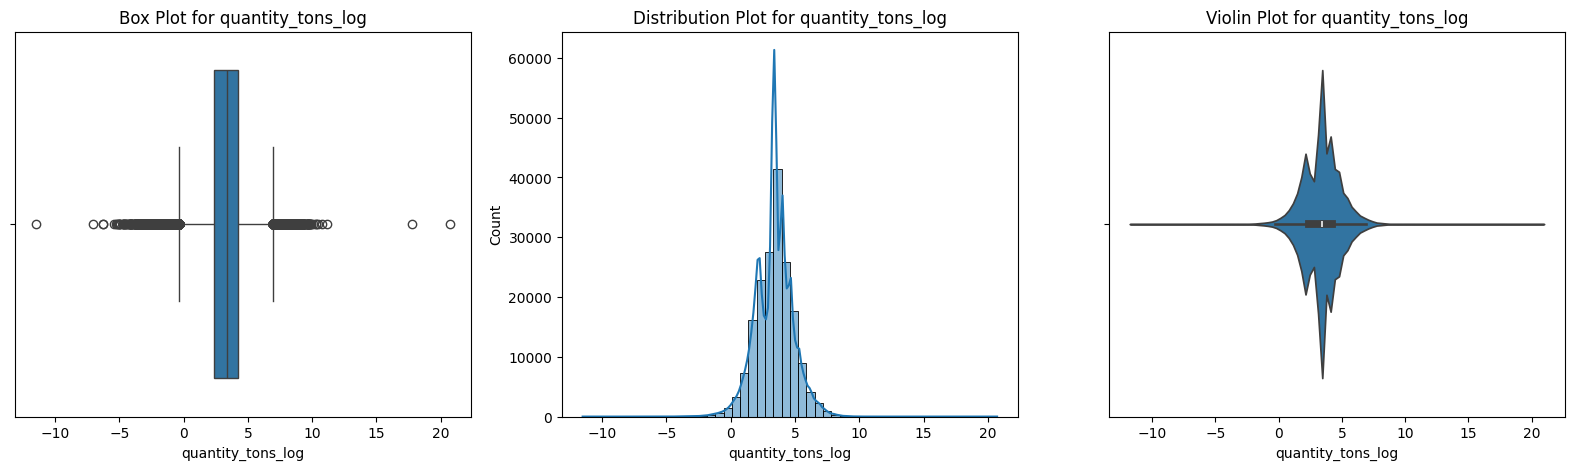

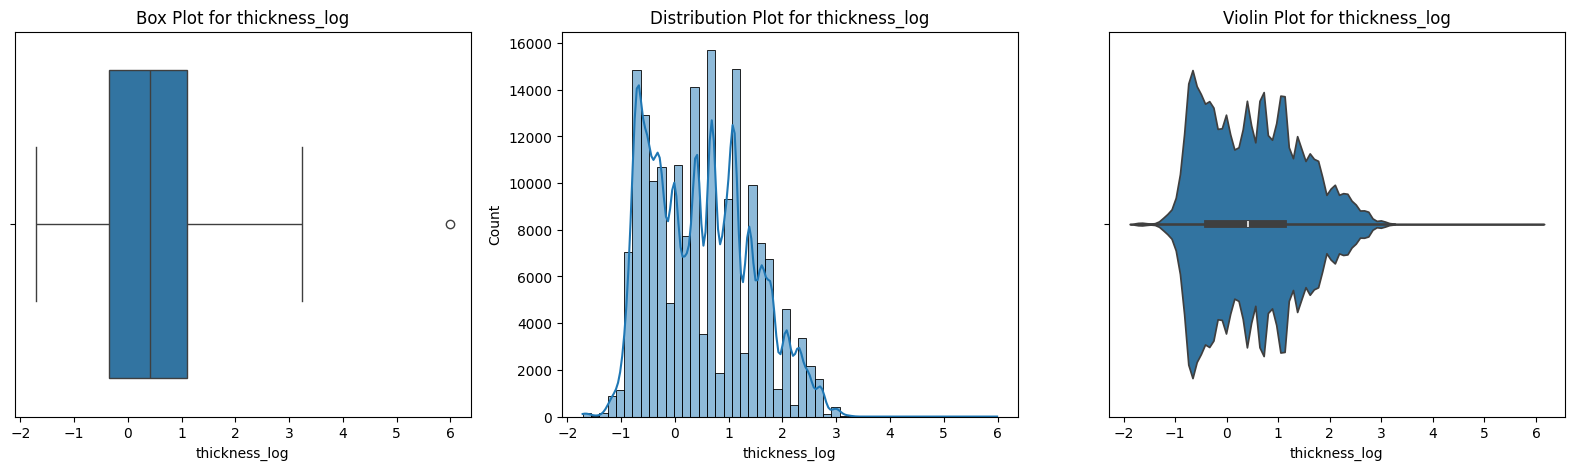

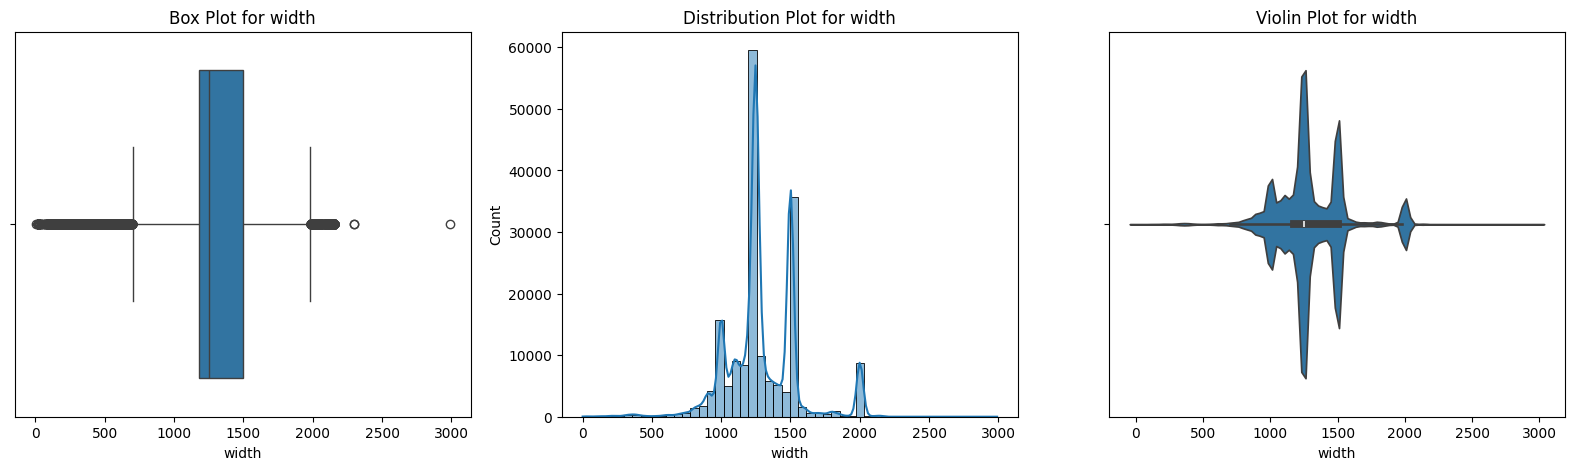

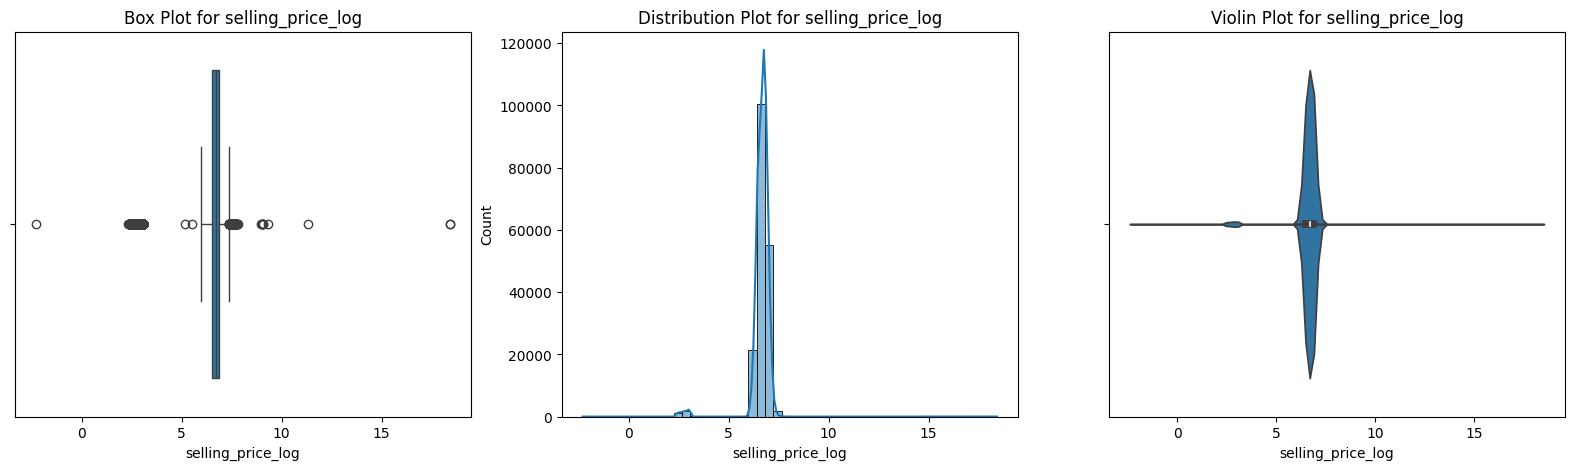

In [ ]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity_tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

In [ ]:
#Use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
df1['status_en'] = OE.fit_transform(df1[['status']])
df1['item_type_en'] = OE.fit_transform(df1[['item_type']])
df1.head()

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,quantity_tons_log,thickness_log,selling_price_log,status_en,item_type_en
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0


In [ ]:
df1.columns

Index(['item_date', 'quantity_tons', 'customer', 'country', 'status',
       'item_type', 'application', 'thickness', 'width', 'product_ref',
       'delivery_date', 'selling_price', 'quantity_tons_log', 'thickness_log',
       'selling_price_log', 'status_en', 'item_type_en'],
      dtype='object')

In [ ]:
item_type_mapping = pd.DataFrame({
    'item_type': df1['item_type'].unique(),
    'item_type_en': df1['item_type_en'].unique()
})

item_type_mapping

,item_type,item_type_en
0,W,5.0
1,WI,6.0
2,S,3.0
3,Others,1.0
4,PL,2.0
5,IPL,0.0
6,SLAWR,4.0


In [ ]:
status_mapping = pd.DataFrame({
    'status': df1['status'].unique(),
    'status_en': df1['status_en'].unique()
})

status_mapping

,status,status_en
0,Won,7.0
1,Draft,0.0
2,To be approved,6.0
3,Lost,1.0
4,Not lost for AM,2.0
5,Wonderful,8.0
6,Revised,5.0
7,Offered,4.0
8,Offerable,3.0


In [ ]:
X=df1[['quantity_tons_log','status_en','item_type_en','application','thickness_log','width','country','customer','product_ref']]
y=df1['selling_price_log']

In [ ]:
X

,quantity_tons_log,status_en,item_type_en,application,thickness_log,width,country,customer,product_ref
0,3.991779,7.0,5.0,10.0,0.693147,1500.0,28.0,30156308.0,1670798778
1,6.643822,7.0,5.0,41.0,-0.223144,1210.0,25.0,30202938.0,1668701718
2,5.956169,7.0,6.0,28.0,-0.967584,952.0,30.0,30153963.0,628377
3,5.310301,7.0,3.0,59.0,0.832909,1317.0,32.0,30349574.0,1668701718
4,6.666354,7.0,5.0,10.0,1.386294,2000.0,28.0,30211560.0,640665
...,...,...,...,...,...,...,...,...,...
181667,4.670802,7.0,5.0,41.0,-0.040822,1240.0,25.0,30200854.0,164141591
181668,4.629691,7.0,5.0,41.0,-0.040822,1220.0,25.0,30200854.0,164141591
181669,5.337954,7.0,5.0,41.0,-0.051293,1500.0,25.0,30200854.0,164141591
181670,1.443523,7.0,5.0,41.0,-0.342490,1250.0,25.0,30200854.0,164141591


In [ ]:
y

,selling_price_log
0,6.749931
1,6.953684
2,6.468211
3,6.643790
4,6.357842
...,...
181667,6.400257
181668,6.381816
181669,6.378426
181670,6.428105


<Axes: >

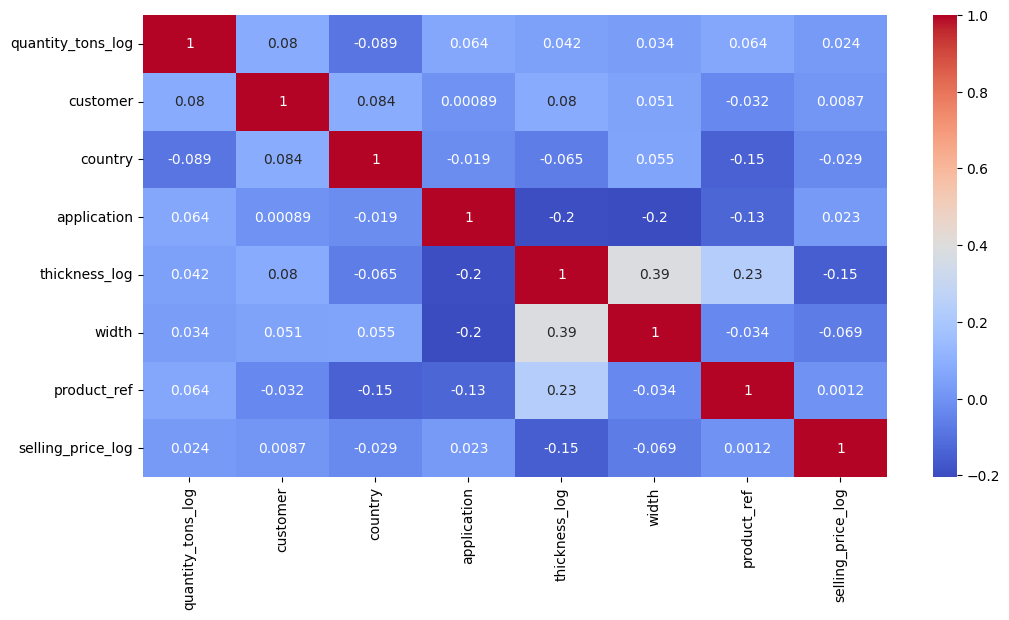

In [ ]:
# verify any columns are highly correlated using Heatmap --- feature engineering

cor=df1[['quantity_tons_log', 'customer', 'country', 'application', 'thickness_log', 'width','product_ref', 'selling_price_log']].corr()

plt.figure(figsize=(12,6))
sns.heatmap(cor, annot=True, cmap="coolwarm")

**Regression model to predict selling price**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import  mean_squared_error, r2_score


#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.08464529095643247


In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.0351620884895891
R-squared: 0.89149631515655


In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.02077063396324403
R-squared: 0.9359056751644952


In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.0332615912534518
R-squared: 0.8973608972110757


In [ ]:
etr =ExtraTreeRegressor()
etr.fit(X_train, y_train)

y_pred = etr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.04073844814645286
R-squared: 0.8742887033003538


 From this observation, RandomForestRegressor model performs well

In [ ]:
new_quantity_tons_log = np.log(40)
status_en = 5.0
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 28
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

new_sample = np.array([[new_quantity_tons_log, status_en, item_type_en, application,
                        new_thickness_log, new_width, country, new_customer, new_product_ref]])

feature_names = ['quantity tons_log','status_en','item_type_en','application','thickness_log',
                 'width','country','customer','product_ref']

# Make predictions using the trained RandomForestRegressor model
new_pred = rf.predict(new_sample)

# Display the predicted resale price
print("Selling Price:", new_pred)

Selling Price: [6.59185493]


In [ ]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

**Classifier Model to predict the Status**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df2 = df1.copy()
df2.head()

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,quantity_tons_log,thickness_log,selling_price_log,status_en,item_type_en
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0


In [ ]:
df3 = df2[df2['status'].isin(['Won', 'Lost'])]
df3.head()

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,quantity_tons_log,thickness_log,selling_price_log,status_en,item_type_en
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0


In [ ]:
df3["status"].value_counts()

,count
status,
Won,115996
Lost,34431


In [ ]:
df3["status_encoded"] = df3['status'].map({"Won":1, "Lost":0})
df3.head()

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,quantity_tons_log,thickness_log,selling_price_log,status_en,item_type_en,status_encoded
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0,1
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0,1
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0,1
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0,1
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0,1


In [ ]:
df4 = df3[['quantity_tons_log','selling_price_log','item_type_en', 'application','thickness_log',
           'width','country','customer','product_ref','status_encoded']]
df4.head()

,quantity_tons_log,selling_price_log,item_type_en,application,thickness_log,width,country,customer,product_ref,status_encoded
0,3.991779,6.749931,5.0,10.0,0.693147,1500.0,28.0,30156308.0,1670798778,1
1,6.643822,6.953684,5.0,41.0,-0.223144,1210.0,25.0,30202938.0,1668701718,1
2,5.956169,6.468211,6.0,28.0,-0.967584,952.0,30.0,30153963.0,628377,1
3,5.310301,6.643790,3.0,59.0,0.832909,1317.0,32.0,30349574.0,1668701718,1
4,6.666354,6.357842,5.0,10.0,1.386294,2000.0,28.0,30211560.0,640665,1


In [ ]:
df4["status_encoded"].value_counts()

,count
status_encoded,
1,115996
0,34431


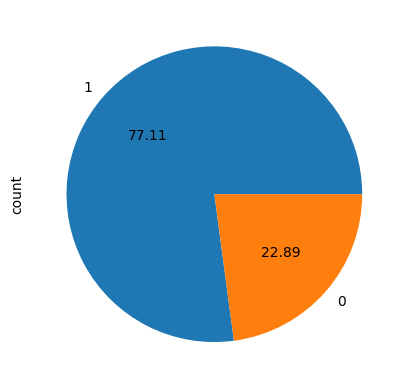

In [ ]:
ax=df4['status_encoded'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'over oversampling using smote')

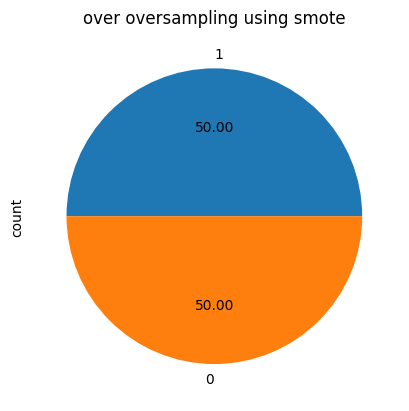

In [ ]:
# oversampling the data using SMOTE(Synthetic Minority Over-sampling Technique)

x=df4.drop('status_encoded',axis=1)
y=df4['status_encoded']

smote= SMOTE()

x_smote, y_smote = smote.fit_resample(x,y)

ax=y_smote.value_counts().plot.pie(autopct='%.2f')
ax.set_title('over oversampling using smote')

In [ ]:
y_smote.value_counts()

,count
status_encoded,
1,115996
0,115996


In [ ]:
y_smote.shape

(231992,)

In [ ]:
len(x_smote)

231992

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(162394, 9)
(69598, 9)
(162394,)
(69598,)


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[32684  2327]
 [ 4376 30211]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     35011
           1       0.93      0.87      0.90     34587

    accuracy                           0.90     69598
   macro avg       0.91      0.90      0.90     69598
weighted avg       0.91      0.90      0.90     69598



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[32629  2382]
 [ 2648 31939]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     35011
           1       0.93      0.92      0.93     34587

    accuracy                           0.93     69598
   macro avg       0.93      0.93      0.93     69598
weighted avg       0.93      0.93      0.93     69598



In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[34012   999]
 [ 2088 32499]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     35011
           1       0.97      0.94      0.95     34587

    accuracy                           0.96     69598
   macro avg       0.96      0.96      0.96     69598
weighted avg       0.96      0.96      0.96     69598



In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[28202  6809]
 [ 8115 26472]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79     35011
           1       0.80      0.77      0.78     34587

    accuracy                           0.79     69598
   macro avg       0.79      0.79      0.79     69598
weighted avg       0.79      0.79      0.79     69598



From this observation we can say that RandomForestClassfier performs well, when compared to other model

In [ ]:
# Define the values for the new sample
new_quantity_tons_log = np.log(40)
selling_price_log = np.log(50)
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 1500.0
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

# Create the new sample as a numpy array
new_sample = np.array([[new_quantity_tons_log, selling_price_log, item_type_en, application,
                         new_thickness_log, new_width, country, new_customer, new_product_ref]])

# Make predictions using the trained RandomForestRegressor model
new_pred = rfc.predict(new_sample)

if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [ ]:
# Saving the model
import pickle
with open('classfier_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)